### Introduction

In this project, I would like to get a better understanding of the crime patterns in different areas within the city of Seattle. In particular, I would like to understand how crime patterns have evolved over time from 2010 to 2017. 

### Motivation

Based on my limited stay in Seattle (just about a year) and knowledge, I have a feeling that crime rates have increased over the last 6 or so months. I believe getting a better undestanding of the crime patterns and how these patterns are evolving in the city of seattle, the policy departments can take the necessary steps to curb the crime rates. These could include - adding more patrols to certain district in Seattle, reoganize the police department locations across the city, recruit more officers etc.  

Based on my research on the crime trends in Seattle, I am embedding a few articles from the last few months that gives an idea about the current crime trends in Seattle. They seem to suggest an increase in crime for certain types of crime and decrease for other types of crime.

1. [Man Shot during UW event](http://www.kiro7.com/news/local/man-shot-during-uw-event-for-milo-yiannopoulos/486520649) [1]
2. [Crime up in Seattle in 2016](https://www.seattletimes.com/seattle-news/crime/fbi-violent-crime-up-in-seattle-and-washington-in-2016-but-murders-specifically-down/) [2]
3. [Seattle crime trends mixed bag under SPD](https://patch.com/washington/seattle/seattle-crime-trends-mixed-bag-under-spd-chief-kathleen-otoole) [3]
4. I have embedded a map of all the 911 calls made in 24 hours to motivate the study. The below picture shows all the 911 calls made from December 6th 3pm to December 7th 3pm. This data is exposed by Seattle police department. About 350 calls were made in 24 hours which seems like a large number to me[4]
<img src="911callsInLast24hours.png" style="width: 400px;"/>

### Dataset and Methodology

The government of Seattle has exposed a dataset which consists of all the 911 incident calls that have taken place from 2010 to 2017. I use the 911 incident calls as a proxy for the crime measure. The datasets consists of information about timestamp, location (latitude, longitude), district name, crime type and a few other attributes to explain the 911 call.

I also use the population data of Seattle to accurately measure the crime rate. To accurately measure crime rate, we can divide the number of 911 calls by population. ( so that we don't want to overestimate the crime rate by just using the number of 911 calls)

I explore these datasets and create visualizations to better understand the crime patterns and trends in the city of Seattle.


### Research Questions

I have compiled a set of research questions which I believe will help in getting a much better understanding of the  crime patterns and trends in the city of seattle. Before we try to find answer the research questions, the below code prepares the necessary datasets

In [1]:
import pandas as pd
import numpy as np
seattle911Data = pd.read_csv('seattle_911_responses.csv') # update this to sample file to run on smaller dataset
seattle911Data['year'] = seattle911Data['Event Clearance Date'].astype(str).str[6:10]

seattePopulationData = [ 616627, 610403, 622323, 635306, 653095, 667963, 683505, 704352, 713700 ]
# Since the population in the city of seattle is constant over the years, I have hard coded them in the above array.
# The above array contains populations from 2009 to 2010 as obtained from US census bureau. Link to the data can be found
# in the README file in the repository.


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### RQ1: Have the crime rates actually increased from 2010 to 2017?

To answer the above questions, I plot the number of 911 calls over the years

In [3]:
crimeOverYears = seattle911Data.groupby(['year']).size().reset_index(name='counts')
crimeOverYears

,year,counts
0,,10124
1,2009,23
2,2010,127957
3,2011,228065
4,2012,255833
5,2013,37304
6,2014,61331
7,2015,234749
8,2016,254606
9,2017,242674


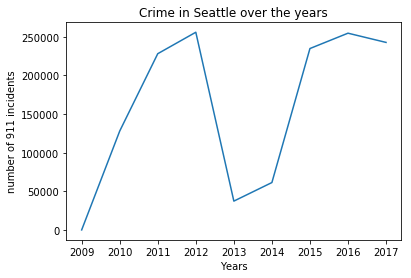

In [8]:
# Plotting the number of 911 calls over years (excluding 911 calls that don't have a year column)
from matplotlib import pyplot as plt
plt.plot( range(2009,2018), crimeOverYears['counts'][1:])
plt.xlabel("Years")
plt.ylabel("number of 911 incidents")
plt.title("Crime in Seattle over the years")
plt.show()

From the above the plot, it looks like the number of 911 calls in years 2009, 2013, 2014 is really low and it could be a potential issue with the data or the population in those years are actually low. In the below plots, I try to consider population while trying to estimate the crime rate.

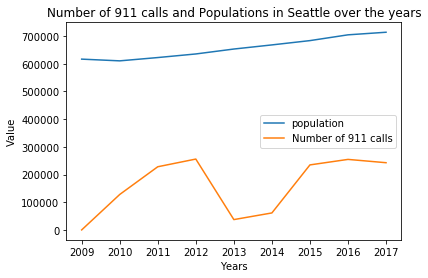

In [10]:
plt.plot( range(2009, 2018), seattePopulationData, label = "population" )
plt.plot( range(2009, 2018), crimeOverYears['counts'][1:], label = 'Number of 911 calls'  )
plt.xlabel("Years")
plt.ylabel("Value")
plt.legend()
plt.title("Number of 911 calls and Populations in Seattle over the years")
plt.show()

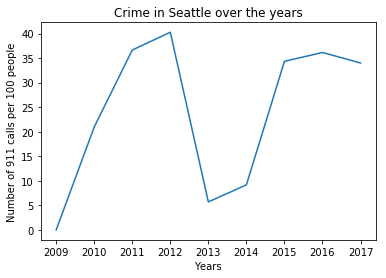

In [38]:
# Plotting the number of 911 calls divided by population to see if there is any change in trend
plt.plot( range(2009, 2018), crimeOverYears['counts'][1:]*100 / seattePopulationData  )
plt.xlabel("Years")
plt.ylabel("Number of 911 calls per 100 people")
plt.title("Crime in Seattle over the years")
plt.show()

From the above plots, it looks like the population actually increased over the years. There could be a potential error with the 911 incidents data in 2009, 2013 and 2014. I also verified with a few articles online [6] and there was no evidence of decreased in crime rates especially in 2013 and 2014.

I therefore plot below the number of 911 calls excluding those years (2009,2013,2014) to obtain the real trend in the data. I am also excluding the year of 2017 as it is current year and we don't have all the 911 calls yet.

From the above plots, it is also evident that when we consider the population of seattle (number of 911 calls divided by population, the crime rate trend does not change much)

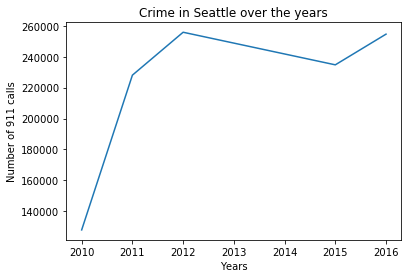

In [39]:
# Plotting the number of 911 calls excluding years 2009, 2013 and 2014 and there could be a potential logging issue in the data.
plt.plot( [2010, 2011, 2012, 2015, 2016], crimeOverYears['counts'][[2,3,4,7,8]])
plt.xlabel("Years")
plt.ylabel("Number of 911 calls")
plt.title("Crime in Seattle over the years")
plt.show()

From the above plot, we can definitely, see an increase in crime from 2010 to 2016. We can also note a slight decreased in number of 911 calls from 2012 to 2015 (We will investigate this in the following research questions)

#### RQ2: Which type of crimes most frequently occur in 2017? Were they the most frequent in 2010?

In [40]:
# Grouping the year, crime type to estimate the number of 911 calls per type, year
# Event Clearance Group basically explains the type of crime

num911callsCrimeTypeYear = seattle911Data.groupby(['Event Clearance Group', 'year']).size().reset_index(name='counts')
crimeGroups = num911callsCrimeTypeYear['Event Clearance Group'].unique()
crimeGroups = crimeGroups[:-1] ## as there is a null group (we exclude it)

In [41]:
crimeGroups

array(['ACCIDENT INVESTIGATION', 'ANIMAL COMPLAINTS', 'ARREST', 'ASSAULTS',
       'AUTO THEFTS', 'BEHAVIORAL HEALTH', 'BIKE', 'BURGLARY', 'CAR PROWL',
       'DISTURBANCES', 'DRIVE BY (NO INJURY)',
       'FAILURE TO REGISTER (SEX OFFENDER)', 'FALSE ALACAD',
       'FALSE ALARMS', 'FRAUD CALLS', 'HARBOR CALLS', 'HAZARDS',
       'HOMICIDE', 'LEWD CONDUCT', 'LIQUOR VIOLATIONS', 'MENTAL HEALTH',
       'MISCELLANEOUS MISDEMEANORS',
       'MOTOR VEHICLE COLLISION INVESTIGATION', 'NARCOTICS COMPLAINTS',
       'NUISANCE, MISCHIEF', 'NUISANCE, MISCHIEF ', 'OTHER PROPERTY',
       'OTHER VICE', 'PERSON DOWN/INJURY',
       'PERSONS - LOST, FOUND, MISSING', 'PROPERTY - MISSING, FOUND',
       'PROPERTY DAMAGE', 'PROSTITUTION', 'PROWLER', 'PUBLIC GATHERINGS',
       'RECKLESS BURNING', 'ROBBERY', 'SHOPLIFTING',
       'SUSPICIOUS CIRCUMSTANCES', 'THREATS, HARASSMENT',
       'TRAFFIC RELATED CALLS', 'TRESPASS', 'VICE CALLS'], dtype=object)

There are about 45 different crime types and you can see them above. I am plotting below a bargraph to see the distribution of these crime types in the data. Since that data may not be reliable for years 2009, 2013 and 2014. I am plotting the bargraph for 2010 and 2016 - This will also help in investigating if the distribution by crime types changed from 2010 to 2016.

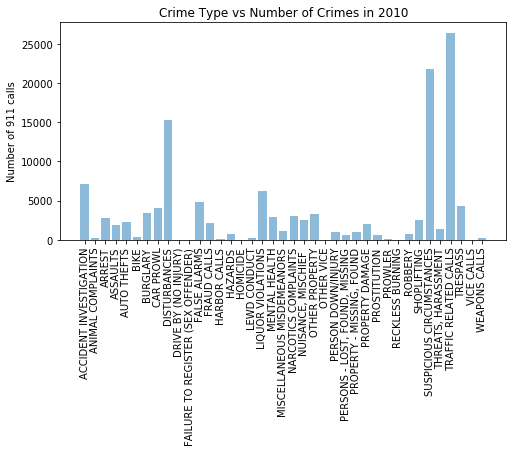

In [48]:
# Plotting a bargraph to visualize the distribution of crime by type
crimebyType2010 = num911callsCrimeTypeYear[ num911callsCrimeTypeYear['year'] == '2010' ]
objects = crimebyType2010['Event Clearance Group']
y_pos = np.arange(len(objects))
performance = crimebyType2010['counts']
plt.figure(figsize=(8,4))  
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Number of 911 calls')
plt.title('Crime Type vs Number of Crimes in 2010')
 
plt.show()

In the above bargraph, we can see that number of 911 calls by crime type for 2010 is dominated by 3 crime types namely  
1. Traffic Related Calls
2. Suspicious Circumstances
3. Disturbances

Below, I try to plot the same bargraph for the year 2016.

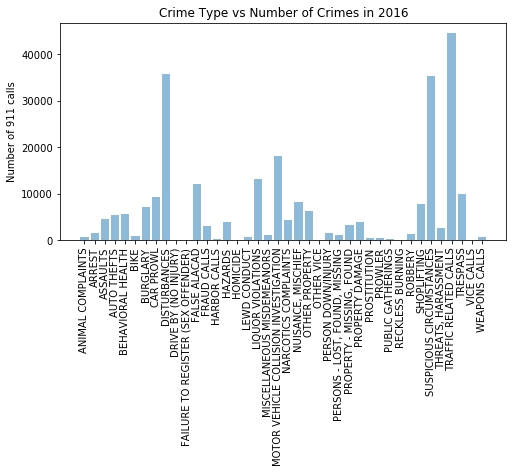

In [51]:
crimebyType2016 = num911callsCrimeTypeYear[ num911callsCrimeTypeYear['year'] == '2016' ]
objects = crimebyType2016['Event Clearance Group']
y_pos = np.arange(len(objects))
performance = crimebyType2016['counts']
plt.figure(figsize=(8,4))  
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Number of 911 calls')
plt.title('Crime Type vs Number of Crimes in 2016')
 
plt.show()

In this bargraph we see a similar distribution in number of 911 calls by crime type to year 2010. We also that the number of 911 calls that pertain to disturbances is much higher in 2016 when compared to 2010. By looking a bargraphs alone we cannot determine the trend in these crime types over the years (Did the number of 911 calls for a particular crime type increase or decrease over the years). In order to help answer this question, I plot a time series visualization for each crime type over the years.

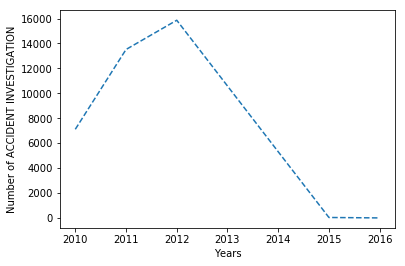

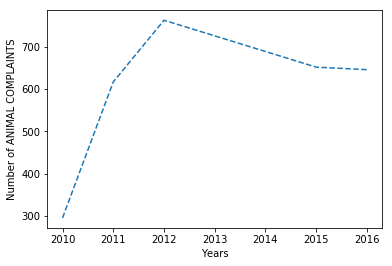

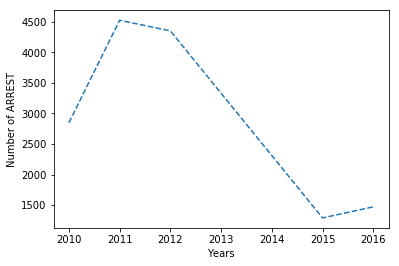

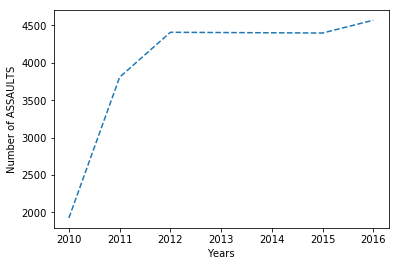

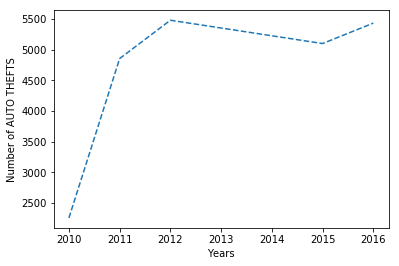

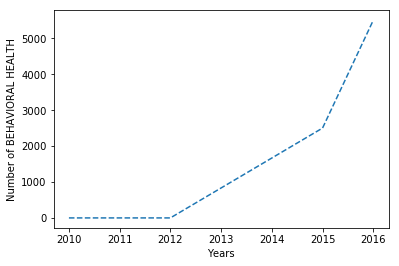

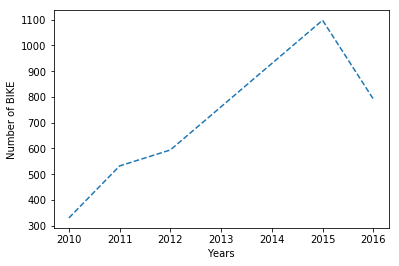

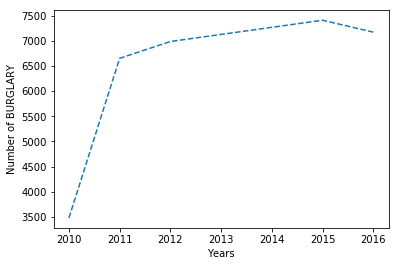

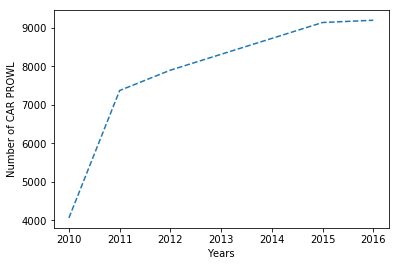

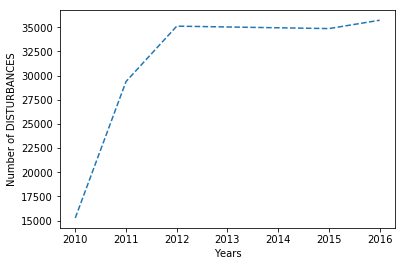

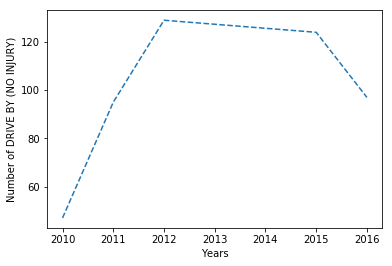

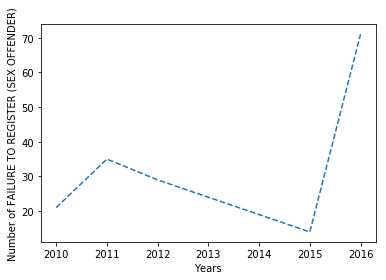

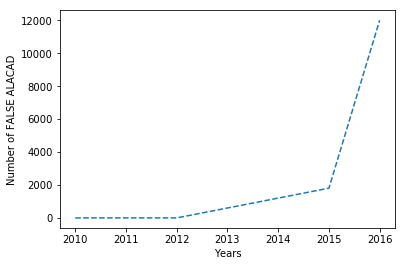

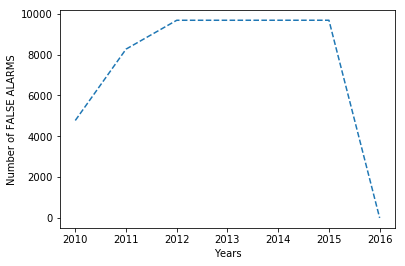

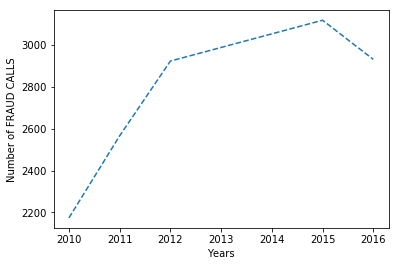

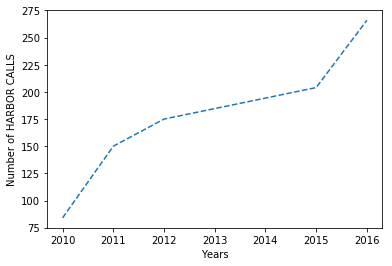

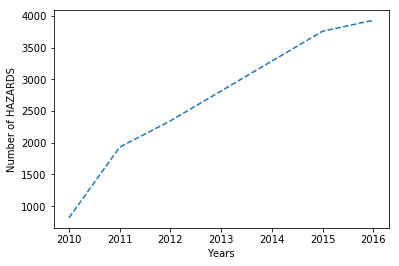

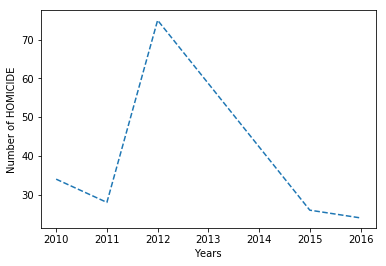

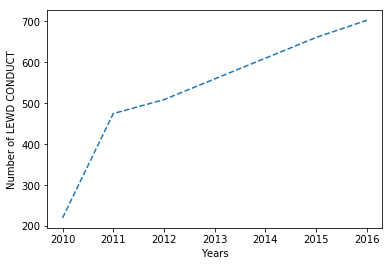

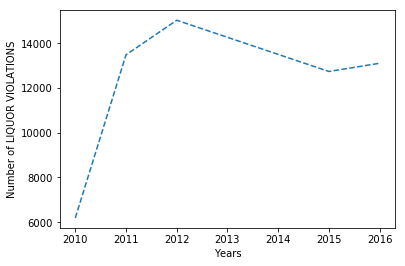

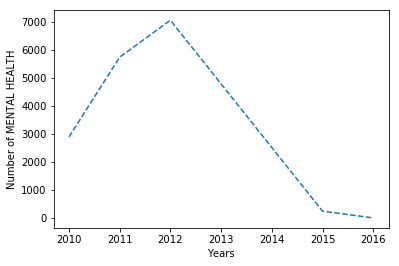

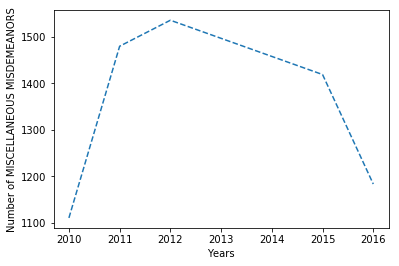

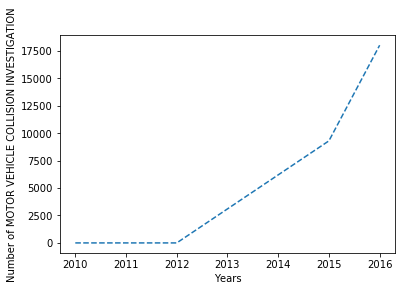

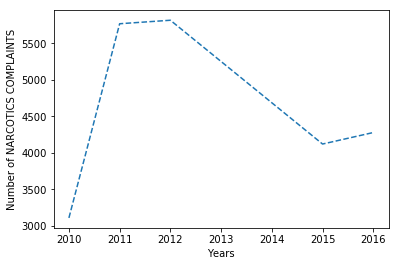

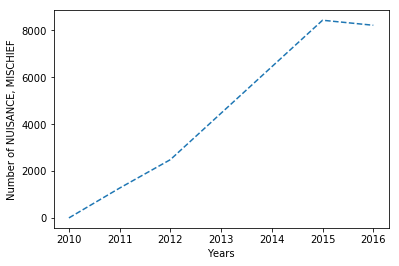

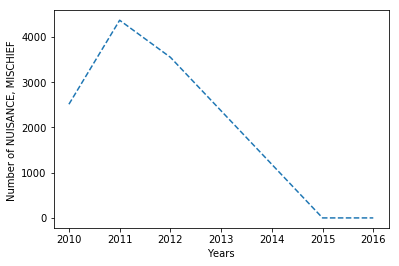

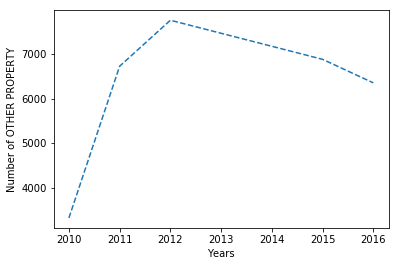

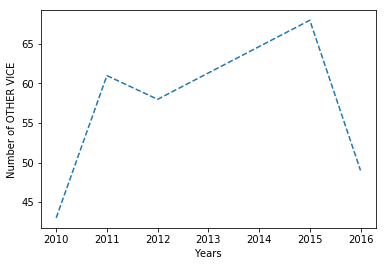

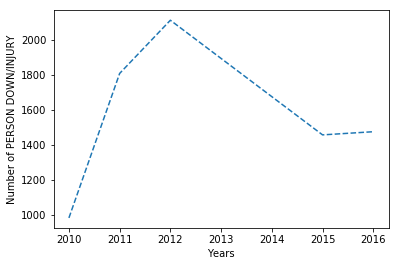

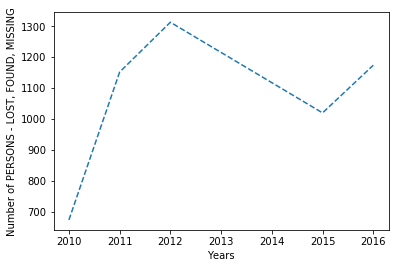

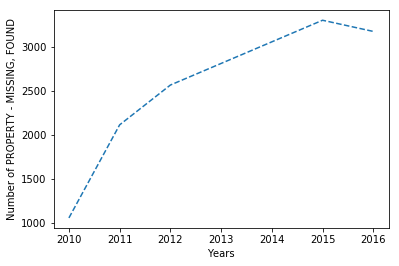

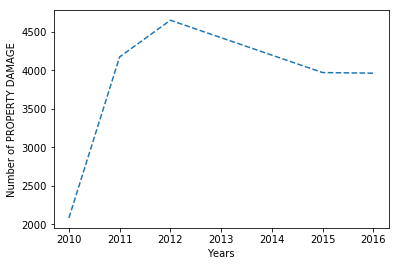

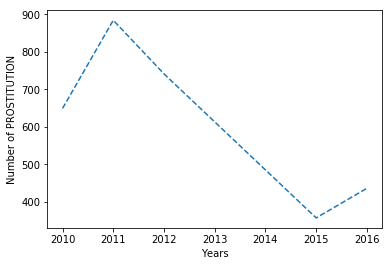

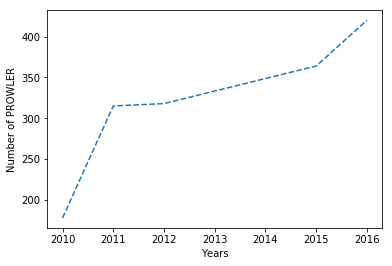

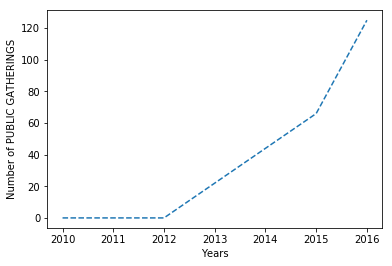

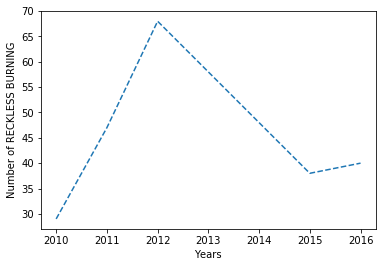

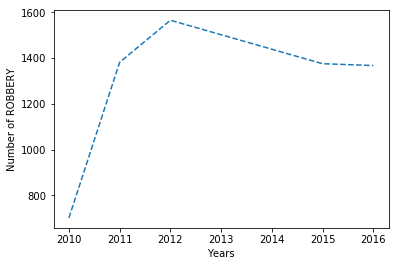

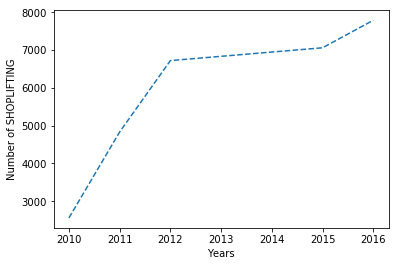

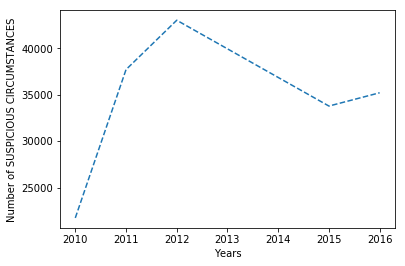

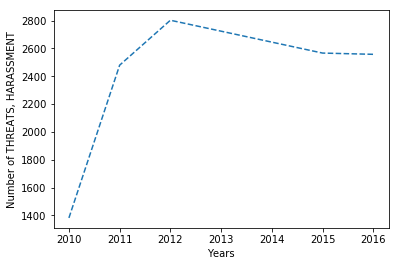

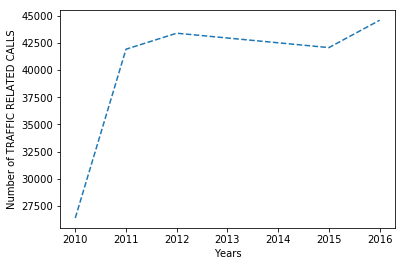

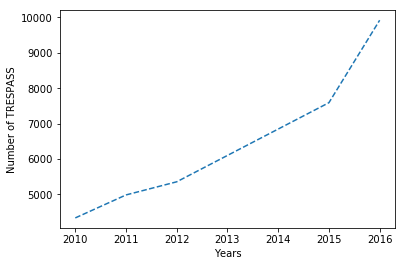

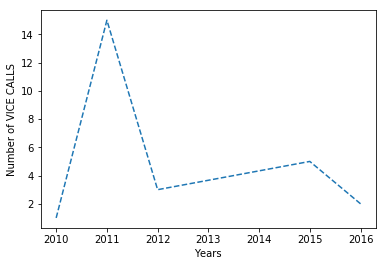

In [54]:
for crime in crimeGroups:
    crimeForGroup = num911callsCrimeTypeYear[ num911callsCrimeTypeYear['Event Clearance Group'] == crime]
    val = []
    for i in range(2010, 2017):
        if( i == 2013 or i == 2014 ): ## excluding years 2013 and 2014
            continue
        crimeForGroupYear = crimeForGroup[ crimeForGroup['year'] == str(i)]
        if(len(crimeForGroupYear) == 0):
            val.append(0)
        else:
            val.append(crimeForGroupYear.iloc[0]['counts'])

    plt.plot([ 2010, 2011, 2012, 2015, 2016], val, '--')
    plt.xlabel("Years")
    plt.ylabel("Number of " + crime )
    plt.show()

From the above trend plots for different crime types, we see that for most of the crime types, the number of 911 calls made actually increased over the years but for a few crime types - they actually decreased over the years.
Examples:  
Number of 911 calls for (Disturbances, Harbor calls, property missing) etc have increased over the years  
Number of 911 calls for (Narcotics, Mental health) etc have decreased over the years.  
(Hypothesis) The number of narcotics related 911 calls might have dropped because marjuana was made legal in 2012



#### RQ3: Which areas in Seattle are most crime prone? Was the same area crime prone in 2010?

The dataset has a column called 'District/Sector'. We see this as a proxy for an area in seattle and try to identify districts that might have a high/low crime rate

In [68]:
# Grouping by year, District/Sector to estimate the number of 911 calls per year, District/Sector

num911callsCrimeTypeDistrict = seattle911Data.groupby(['District/Sector', 'year']).size().reset_index(name='counts')
districts = num911callsCrimeTypeDistrict['District/Sector'].unique()
districts

array(['99', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N',
       'O', 'Q', 'R', 'S', 'U', 'W'], dtype=object)

The above array shows all the district names in the city of Seattle. It was relatively difficult to map the districts to corresponding areas in seattle (like downtown, capitol hill)  

I am plotting below a bargraph to see the distribution of 911 calls by district in the data. Since that data may not be reliable for years 2009, 2013 and 2014. I am plotting the bargraph for 2010 and 2016 - This will also help in investigating if the distribution by 911 calls by district has changed from 2010 to 2016.

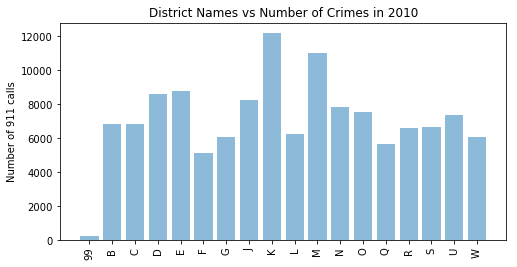

In [56]:
# Plotting a bargraph to visualize the distribution of crime by district 
crimebyDistrict2010 = num911callsCrimeTypeDistrict[ num911callsCrimeTypeDistrict['year'] == '2010' ]
objects = crimebyDistrict2010['District/Sector']
y_pos = np.arange(len(objects))
performance = crimebyDistrict2010['counts']
plt.figure(figsize=(8,4))  
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Number of 911 calls')
plt.title('District Names vs Number of Crimes in 2010')
 
plt.show()

In the above plot, we see the distribution of 911 calls by district. We see the number of 911 calls are relatively high for districts K and M. By manually looking at the data and checking the corresponding latitude, longitude values, it looks like the districts K and M correspond to the areas - Downtown and International District.

I plot the same bargraph below for the year 2016

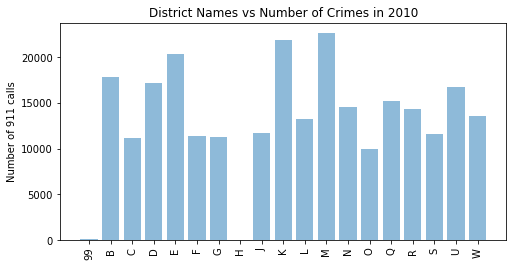

In [57]:
# Plotting a bargraph to visualize the distribution of crime by district 
crimebyDistrict2010 = num911callsCrimeTypeDistrict[ num911callsCrimeTypeDistrict['year'] == '2016' ]
objects = crimebyDistrict2010['District/Sector']
y_pos = np.arange(len(objects))
performance = crimebyDistrict2010['counts']
plt.figure(figsize=(8,4))  
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Number of 911 calls')
plt.title('District Names vs Number of Crimes in 2010')
 
plt.show()

Firstly, we still see district K and M are contributing to most of the crime in the city. We also see new districts added in 2016 which were no there in 2010 ( District H ). The overall distribution for the different districts is somewhat similar but not identical.

In order to get an better understanding of how crime in these districts have progressed over the years, I plot below a time series visualization of the number of 911 calls in each district over the years. 

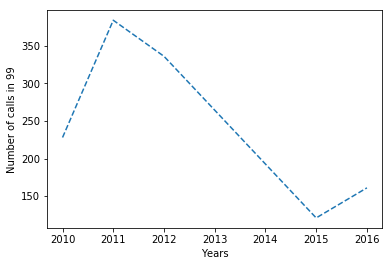

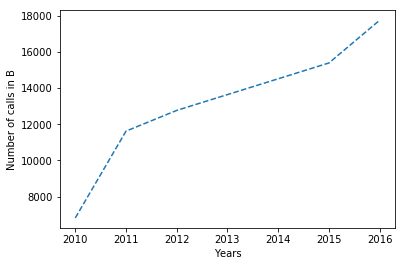

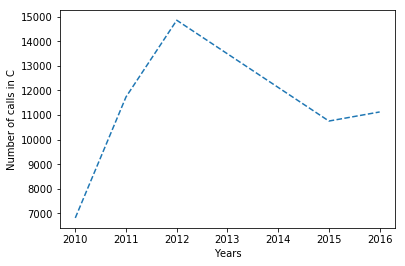

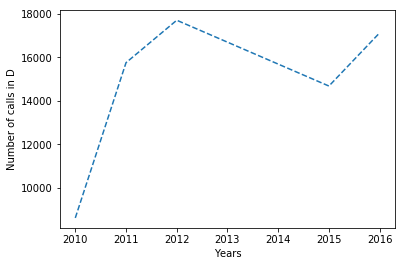

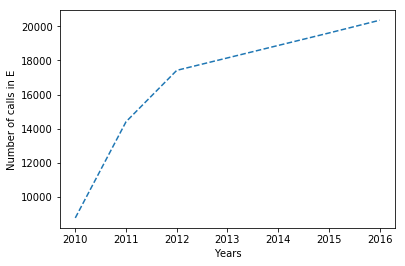

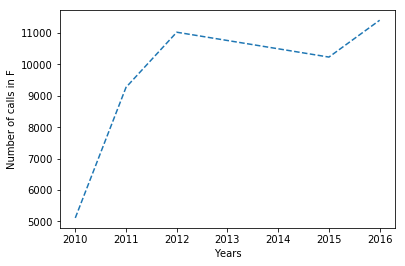

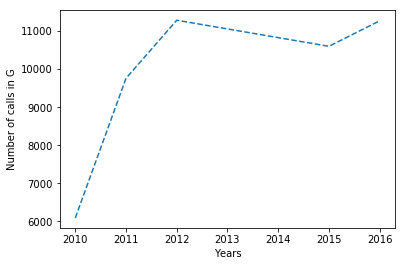

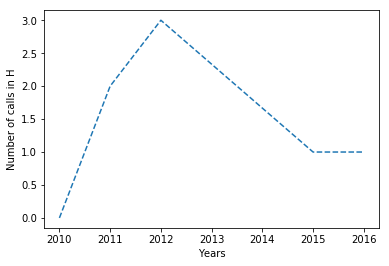

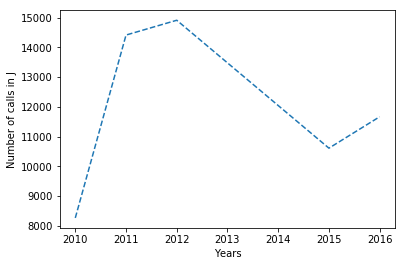

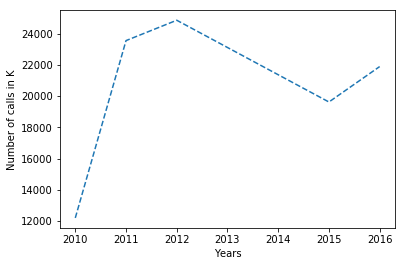

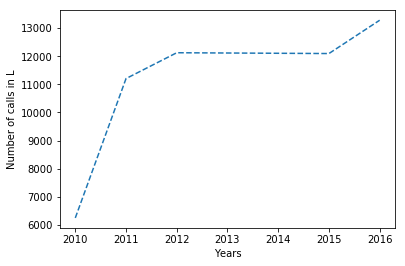

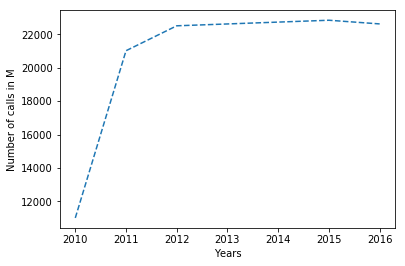

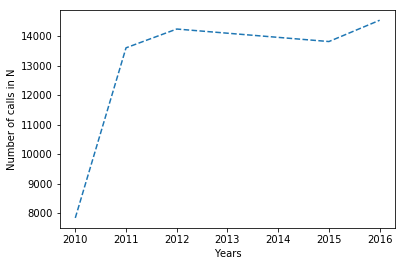

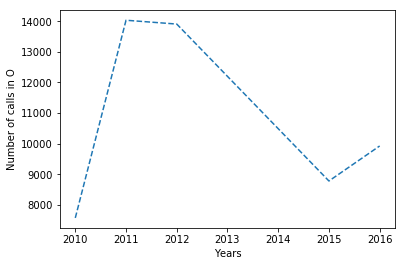

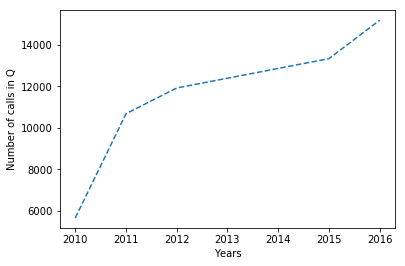

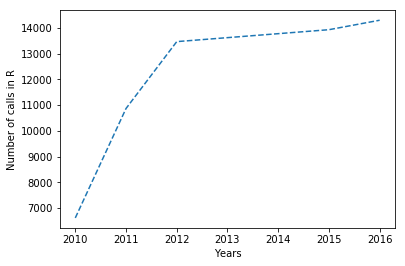

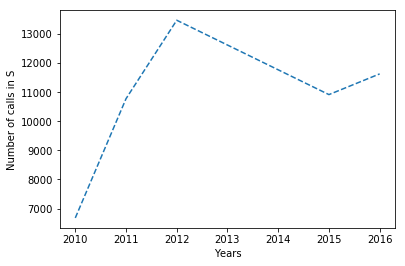

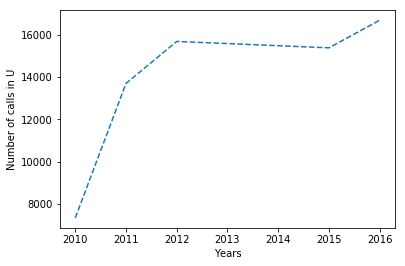

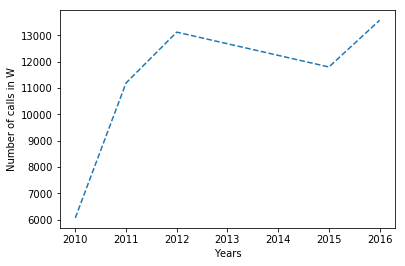

In [58]:
for district in districts:
    crimeInDistrict = num911callsCrimeTypeDistrict[ num911callsCrimeTypeDistrict['District/Sector'] == district]
    val = []
    for i in range(2010, 2017):
        if( i == 2013 or i == 2014 ): ## excluding years 2013 and 2014
            continue
        crimeInDistrictyear = crimeInDistrict[ crimeInDistrict['year'] == str(i)]
        if(len(crimeInDistrictyear) == 0):
            val.append(0)
        else:
            val.append(crimeInDistrictyear.iloc[0]['counts'])

    plt.plot([ 2010, 2011, 2012, 2015, 2016], val, '--')
    plt.xlabel("Years")
    plt.ylabel("Number of calls in " + district )
    plt.show()

From the above trend plots, we see that the crime rates in a lot of districts have increased over the years and crime rates in certain districts have decreased over the years.  
Crime rate in districts B,D,E,f have increased over years.  
Crime rates in districts C, H have decreased over years


#### Heatmap for the city of Seattle

To get a better visualization of the crime rates in city of Seattle, I have leveraged the google maps API[5] to generate a heatmap of crime rates. The dataset of 911 incidents has around 1.5million rows and Google Maps API has limit on the number of data points it can show so I have sampled about 20000 points from the data to generate the below visualization.

<img src="heatmap.png" style="width: 400px;"/>

From the above visualization, we can clearly see that most of crime is concentrated around the downtown international district area.  
The above visualization was generated using a html file which is attached in repository (please have a look)

### Implications

This projects can be extremely valuable to Seattle police department. Understanding the current crime patterns in city and also getting a better comprehension on how crimes have evolved in the city can help the police department with better and more efficient management. For example:  
1. Police department can reorganize the locations
2. Police department can make efficient recruiting strategies (need more police officers to tackle a crime type X)

While the work can have very strong positive implications, it is extremely important how this information is conveyed to the public. Releasing information that quantify the crime measures in parts of Seattle can cause people to panic and avoid certain area. 


### Limitations/Risks

There are some limitations/risks involved in this project  

1. We use 911 incident data as proxy for crime measure. It is however possible that this does not accruately determine the crime in some areas (crimes might occur but 911 was never called - in such case, we don't have any information)  
2. We are extremely biased by the accuracy of 911 data. If there were any potential issues like the data was never logged for certain peroid of times - these will never be caught by our analysis.
3. Another important aspect to consider is the intensity of crimes committed. In our current analysis, we have not quanitfied the intensity of a particular crime type (all the crime types are considered equal) but this might not be true in the real world (certain crime types are definitely more harmful than others). As we don't have approppriate domain expertise, we have not incorporated it in this analysis.

### Conclusion

RQ1: Have the crime rates actually increased from 2010 to 2017?  
From the above analysis we see that the crime rates have increased from 2010 to present. By looking at the graphs we can also see that crime rate has increased from 2015 to 2016 and it could further increase in 2017.  

RQ2: Which type of crimes most frequently occur in 2016? Were they the most frequent in 2010?  
We see that traffic related issues, disturbances and suspicious circumstances contribute to most of the crime in 2010 and in 2016. We also note that 911 calls for certain crime types have increased (harbor calls, property missing etc) and for certain other (mental health, narcotics etc), they have decreased.  


RQ3: Which areas in Seattle are most crime prone? Was the same area crime prone in 2010?  
We see that districts K and M contribute to most of the crime in Seattle in 2010 and in 2016. These basically constitutes areas such as downtown, capitol hill and international district. The heatmap above clearly helps us visualize this. We also note that crime in certain districts have increased(B,D,E,F) over the years and in certain other districts, they have decreased (C,H)  

  
Overall, I would like to conclude by saying that this analysis can have a lot of impact in helping the police department curb crime activities



### Future Work

1. As an extension of the current analysis, we can incorporate intensity of crime by connecting with police officials and domain experts.
2. We could leverage the current data and also consider more data such socio economic features to see if we can develop a machine learning model to predict the crime measure of a district given a timestamp. This will really help the police department with efforts to curb crime. 


### References

[1] http://www.kiro7.com/news/local/man-shot-during-uw-event-for-milo-yiannopoulos/486520649  
[2] https://www.seattletimes.com/seattle-news/crime/fbi-violent-crime-up-in-seattle-and-washington-in-2016-but-murders-specifically-down/  
[3] https://patch.com/washington/seattle/seattle-crime-trends-mixed-bag-under-spd-chief-kathleen-otoole  
[4] http://seattlecitygis.maps.arcgis.com/apps/MapSeries/index.html?appid=94c31b66facc438b95d95a6cb6a0ff2e  
[5] https://developers.google.com/maps/documentation/javascript/examples/layer-heatmap  
